# 1 Introduction

## 1.0 Package imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import os
import itertools

# 2 Visualizations

## 2.0 Function definitions

In [93]:
def load_year(country: str,
              year: int,
              ) -> [pd.DataFrame, pd.DataFrame]:

    lats, longs = [], []
    types = []
    
    admin = gpd.read_file('../data/reference/{}.geojson'.format(country))

    for (month, day) in itertools.product(range(1, 13), range(1, 29)):
        file = "../data/{}/raw/{}/{}{}{}.csv".format(country,
                                                     str(year),
                                                     str(year),
                                                     str(month).zfill(2),
                                                     str(day).zfill(2))
        if os.path.exists(file):
            gdelt = pd.read_csv(file)
            gdelt = gdelt[gdelt['ActionGeo_Lat'].notna()]
            lats.extend(list(gdelt['ActionGeo_Lat']))
            longs.extend(list(gdelt['ActionGeo_Long']))
            types.extend(list(gdelt['QuadClass']))

    coords = pd.DataFrame({'Latitude': np.array(lats).flatten(), 
                           'Longitude': np.array(longs).flatten(),
                           'Type': np.array(types).flatten()})

    coords['latlong'] = coords["Latitude"].astype(str) + coords["Longitude"].astype(str)
    coords = coords.groupby(['latlong', 'Latitude', 'Longitude']).count().reset_index()

    coords = gpd.GeoDataFrame(coords, geometry=gpd.points_from_xy(coords.Longitude,
                                                                  coords.Latitude))
    coords['Type'] = coords['Type'].astype(float)
    return admin, coords

## 2.1 Brazil

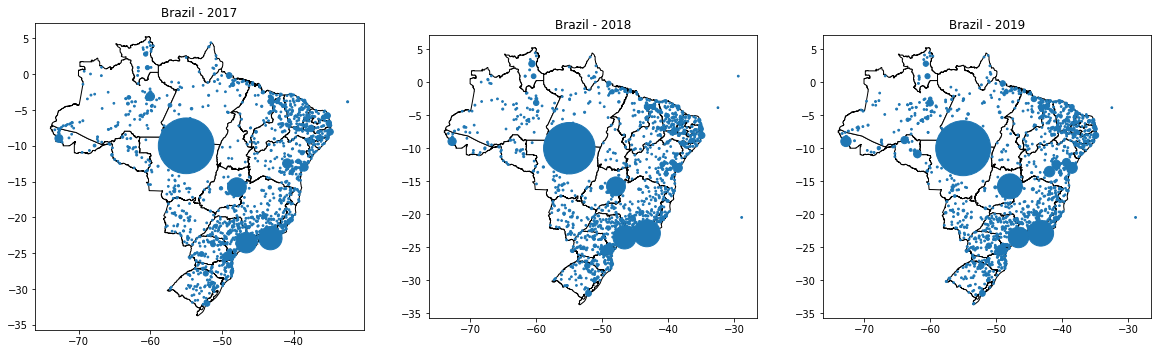

In [103]:
f, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 12))

brazil, coords = load_year('brazil', 2017)
ax1 = brazil.plot(color='white', edgecolor='black', ax = ax1)
ax1.set_title("Brazil - 2017")
coords.plot(ax=ax1, markersize = (3 + coords['Type'] / 30))

brazil, coords = load_year('brazil', 2018)
ax2 = brazil.plot(color='white', edgecolor='black', ax = ax2)
ax2.set_title("Brazil - 2018")
coords.plot(ax=ax2, markersize = (3 + coords['Type'] / 30))

brazil, coords = load_year('brazil', 2019)
ax3 = brazil.plot(color='white', edgecolor='black', ax = ax3)
ax3.set_title("Brazil - 2019")
coords.plot(ax=ax3, markersize = (3 + coords['Type'] / 30))

## 2.2 Indonesia

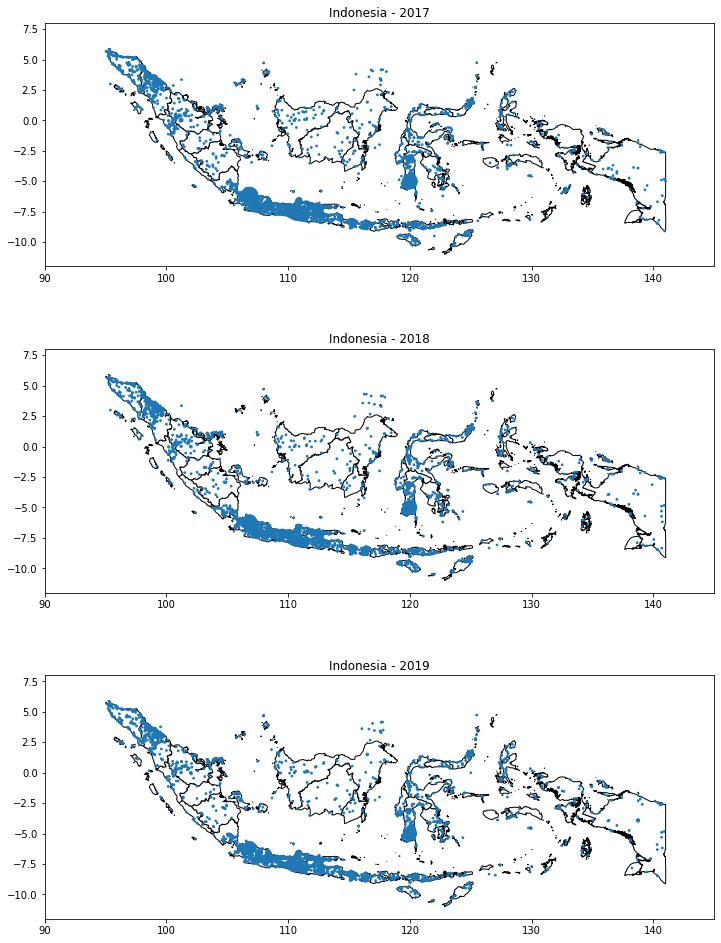

In [107]:
f, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize=(12, 17))

indonesia, coords = load_year('indonesia', 2017)
ax1 = indonesia.plot(color='white', edgecolor='black', ax = ax1)
ax1.set_title("Indonesia - 2017")
ax1.set_xlim(90, 145)
ax1.set_ylim(-12, 8)
coords.plot(ax=ax1, markersize = (3 + coords['Type'] / 300))

indonesia, coords = load_year('indonesia', 2018)
ax2 = indonesia.plot(color='white', edgecolor='black', ax = ax2)
ax2.set_title("Indonesia - 2018")
ax2.set_xlim(90, 145)
ax2.set_ylim(-12, 8)
coords.plot(ax=ax2, markersize = (3 + coords['Type'] / 300))

indonesia, coords = load_year('indonesia', 2019)
ax3 = indonesia.plot(color='white', edgecolor='black', ax = ax3)
ax3.set_title("Indonesia - 2019")
ax3.set_xlim(90, 145)
ax3.set_ylim(-12, 8)
coords.plot(ax=ax3, markersize = (3 + coords['Type'] / 300))


## 2.3 Mexico

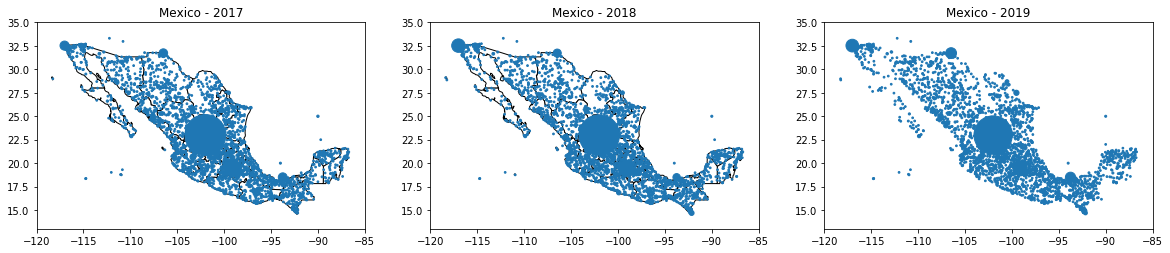

In [109]:
f, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 12))

mexico, coords = load_year('mexico', 2017)
ax1 = mexico.plot(color='white', edgecolor='black', ax = ax1)
ax1.set_title("Mexico - 2017")
ax1.set_ylim(13, 35)
ax1.set_xlim(-120, -85)
coords.plot(ax=ax1, markersize = (3 + coords['Type'] / 150))

mexico, coords = load_year('mexico', 2018)
ax2 = mexico.plot(color='white', edgecolor='black', ax = ax2)
ax2.set_title("Mexico - 2018")
ax2.set_ylim(13, 35)
ax2.set_xlim(-120, -85)
coords.plot(ax=ax2, markersize = (3 + coords['Type'] / 150))

mexico, coords = load_year('mexico', 2019)
ax3 = brazil.plot(color='white', edgecolor='black', ax = ax3)
ax3.set_title("Mexico - 2019")
ax3.set_ylim(13, 35)
ax3.set_xlim(-120, -85)
coords.plot(ax=ax3, markersize = (3 + coords['Type'] / 150))